In [2]:
import numpy as np
import pandas as pd


In [3]:
df_calfire = pd.read_csv('mapdataall.csv', encoding = "ISO-8859-1") 

In [4]:
df_calfire = df_calfire[df_calfire["incident_type"] == "Wildfire"]

In [8]:
df_merged = pd.read_csv('merged_data_final.csv', encoding = "ISO-8859-1")
df_merged

,incident_name,incident_is_final,incident_date_last_update,incident_date_created,incident_administrative_unit,incident_administrative_unit_url,County,incident_location,incident_acres_burned,incident_containment,...,AQS Parameter Description,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,Site Latitude,Site Longitude
0,Nob Fire,Y,2024-04-04T10:04:47Z,2023-04-26T10:16:00Z,San Bernardino National Forest,NaN,San Bernardino,"East Blue Ridge and Paiute, south of Wrightwood",NaN,NaN,...,Acceptable PM2.5 AQI & Speciation Mass,171.0,Met-one BAM-1022 W/PM2.5 SCC,40140.0,"Riverside-San Bernardino-Ontario, CA",6,California,71,34.243100,-117.272350
1,Nob Fire,Y,2024-04-04T10:04:47Z,2023-04-26T10:16:00Z,San Bernardino National Forest,NaN,San Bernardino,"East Blue Ridge and Paiute, south of Wrightwood",NaN,NaN,...,PM2.5 - Local Conditions,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,40140.0,"Riverside-San Bernardino-Ontario, CA",6,California,71,34.030833,-117.617220
2,Nob Fire,Y,2024-04-04T10:04:47Z,2023-04-26T10:16:00Z,San Bernardino National Forest,NaN,San Bernardino,"East Blue Ridge and Paiute, south of Wrightwood",NaN,NaN,...,PM2.5 - Local Conditions,117.0,R & P Model 2000 PM2.5 Sampler w/WINS,40140.0,"Riverside-San Bernardino-Ontario, CA",6,California,71,34.510961,-117.325540
3,Nob Fire,Y,2024-04-04T10:04:47Z,2023-04-26T10:16:00Z,San Bernardino National Forest,NaN,San Bernardino,"East Blue Ridge and Paiute, south of Wrightwood",NaN,NaN,...,PM2.5 - Local Conditions,170.0,Met One BAM-1020 Mass Monitor w/VSCC,40140.0,"Riverside-San Bernardino-Ontario, CA",6,California,71,34.510961,-117.325540
4,Nob Fire,Y,2024-04-04T10:04:47Z,2023-04-26T10:16:00Z,San Bernardino National Forest,NaN,San Bernardino,"East Blue Ridge and Paiute, south of Wrightwood",NaN,NaN,...,PM2.5 - Local Conditions,209.0,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,40140.0,"Riverside-San Bernardino-Ontario, CA",6,California,71,34.264640,-116.861470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,Riverview Fire,N,2024-10-26T07:34:55Z,2024-10-24T16:05:00Z,Santa Barbara County Fire Department,NaN,Santa Barbara,W Highway 246 and Riverview Drive,64.0,100.0,...,PM2.5 - Local Conditions,NaN,NaN,42200.0,"Santa Maria-Santa Barbara, CA",6,California,83,34.427775,-119.691218
3439,Riverview Fire,N,2024-10-26T07:34:55Z,2024-10-24T16:05:00Z,Santa Barbara County Fire Department,NaN,Santa Barbara,W Highway 246 and Riverview Drive,64.0,100.0,...,PM2.5 - Local Conditions,NaN,NaN,42200.0,"Santa Maria-Santa Barbara, CA",6,California,83,34.890667,-120.432844
3440,Riverview Fire,N,2024-10-26T07:34:55Z,2024-10-24T16:05:00Z,Santa Barbara County Fire Department,NaN,Santa Barbara,W Highway 246 and Riverview Drive,64.0,100.0,...,PM2.5 - Local Conditions,NaN,NaN,42200.0,"Santa Maria-Santa Barbara, CA",6,California,83,34.637820,-120.457500
3441,Riverview Fire,N,2024-10-26T07:34:55Z,2024-10-24T16:05:00Z,Santa Barbara County Fire Department,NaN,Santa Barbara,W Highway 246 and Riverview Drive,64.0,100.0,...,PM2.5 - Local Conditions,NaN,NaN,42200.0,"Santa Maria-Santa Barbara, CA",6,California,83,34.445510,-119.828400


In [ ]:
# why are there 6 of each row?

In [9]:
df_merged.columns 

Index(['incident_name', 'incident_is_final', 'incident_date_last_update',
       'incident_date_created', 'incident_administrative_unit',
       'incident_administrative_unit_url', 'County', 'incident_location',
       'incident_acres_burned', 'incident_containment', 'incident_control',
       'incident_cooperating_agencies', 'incident_longitude',
       'incident_latitude', 'incident_type', 'incident_id', 'incident_url',
       'incident_date_extinguished', 'incident_dateonly_extinguished',
       'incident_dateonly_created', 'is_active', 'calfire_incident',
       'notification_desired', 'Date', 'Source', 'Site ID', 'POC',
       'Daily Mean PM2.5 Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
       'AQS Parameter Code', 'AQS Parameter Description', 'Method Code',
       'Method Description', 'CBSA Code', 'CBSA Name', 'State FIPS Code',
       'State', 'County FIPS Code', 'Site Latitude', 'Site Longitude'],
      dtype='o

In [19]:
df_merged['Daily Mean PM2.5 Concentration']

0        4.2
1       15.6
2        8.3
3        8.9
4        3.3
        ... 
3438    14.6
3439     9.4
3440    10.2
3441     9.2
3442     9.0
Name: Daily Mean PM2.5 Concentration, Length: 3443, dtype: float64

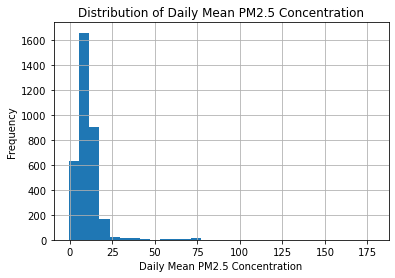

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_merged['Daily Mean PM2.5 Concentration'].hist(bins=30)
plt.xlabel('Daily Mean PM2.5 Concentration')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Mean PM2.5 Concentration')
plt.show()

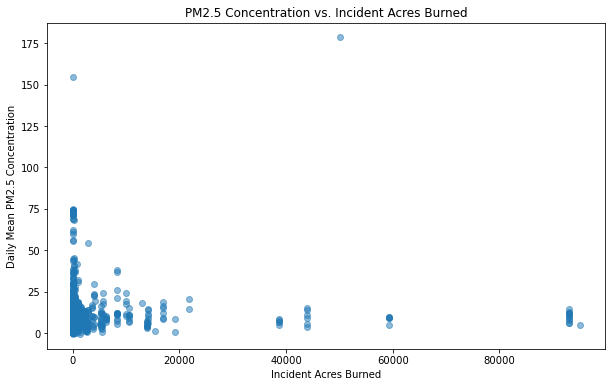

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['incident_acres_burned'], df_merged['Daily Mean PM2.5 Concentration'], alpha=0.5)
plt.xlabel('Incident Acres Burned')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.title('PM2.5 Concentration vs. Incident Acres Burned')
plt.show()

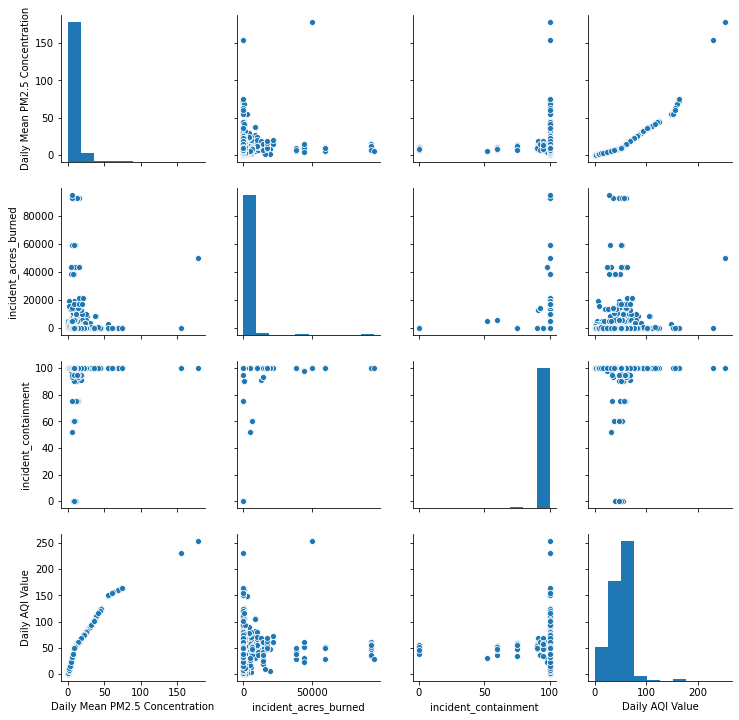

In [15]:
sns.pairplot(df_merged[['Daily Mean PM2.5 Concentration', 'incident_acres_burned', 'incident_containment', 'Daily AQI Value']])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_merged[['incident_acres_burned', 'incident_containment']]
y = df_merged['Daily Mean PM2.5 Concentration']

# Drop rows with missing values
df_clean = df_merged[['Daily Mean PM2.5 Concentration', 'incident_acres_burned', 'incident_containment']].dropna()
X = df_clean[['incident_acres_burned', 'incident_containment']]
y = df_clean['Daily Mean PM2.5 Concentration']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 61.70501571933778


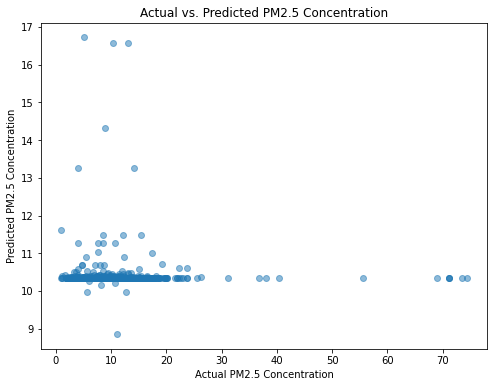

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.title('Actual vs. Predicted PM2.5 Concentration')
plt.show()